## Logistic Regression

Logistic Regression applies a non-linear transformation to the linear regression output in order to bring the output in the range $[0:1]$. 

In [134]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

The standard logistic sigmoid function:
$$f(x)=\frac{1}{1+e^{-x}}$$

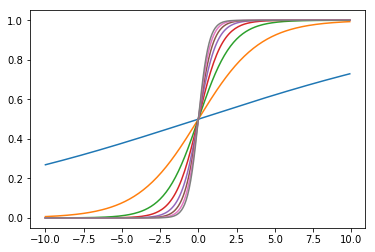

In [135]:
def sigmoid(x,beta=1.0,offset = 0.0):
    return 1/(1+np.exp(-beta*x + offset))

plt.figure() 
x = np.arange(-10, 10,0.1)
for beta in np.arange(0.1,3.0,0.4):
    plt.plot(x, sigmoid (x, beta))
    


### Logistic Regression for Classification

Since logistic regression prodcues outputs close to 0 and +1 it can be used to train a classification problem, like the IRIS data set, with labels 0 and +1 (or -1 and +1 by using a `tanh` function)

Let's start with a toy dataset, consisting of 2 clusters/classes:

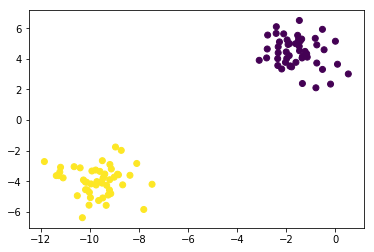

In [148]:
from sklearn.datasets.samples_generator import make_blobs

X,y = make_blobs(centers=2,random_state=1)
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

We extend the stochastic gradient descent from [Linear Regression](Linear-Regression.ipynb) by the sigmoid function.
The cost for a single training example is then given by:

$$
cost(w,x_i) = \frac{1}{2} (sigmoid(w^T x_i)-y_i)^2 = error_i^2
$$ 

Accordingly, we descend on the error surface by taking small steps in the direction of the negative gradient:

$$
w = w - \eta \frac{\partial{cost(w,x_i)}}{\partial{w}}
$$

Let's define our prediction $sigmoid(w^T x)$ as $\hat{y}$ and the input $w^T x$ to the sigmoid as $l$

By applying the chain rule, we get:

$$
\frac{\partial{cost(w,x_i)}}{\partial{w}} =
\frac{\partial{cost(w,x_i)}}{\partial{\hat{y_i}}} \cdot
\frac{\partial{\hat{y_i}}}{\partial{l_i}} \cdot
\frac{\partial{l_i}}{\partial{w}}
$$
with:
$$
\begin{aligned}
& \frac{\partial{cost(w,x_i)}}{\partial{\hat{y_i}}} = sigmoid(w^T x_i)-y_i = \hat{y_i} - y_i = error_i \\
& \frac{\partial{\hat{y_i}}}{\partial{l_i}} = sigmoid(w^T x_i) \cdot (1-sigmoid(w^T x_i)) = \hat{y_i} \cdot (1-\hat{y_i}) \\
& \frac{\partial{l_i}}{\partial{w}} = x_i \\
\end{aligned}
$$

plugging into the weight update formula:

$$
w = w - \eta \cdot error_i \cdot \hat{y_i} \cdot (1-\hat{y_i}) \cdot x_i
$$

<div class = "alert alert-info">
<span style="color:red">**Attention:**</span> The squared error is not a good choice for logistic regression. In practice, a different cost function is used!
</div>

In [153]:
# stochastic gradient descent
def lr_sg(x,y,eta=0.1,iterations=1000, debug=False):
    """
    x: data matrix
    y: target values
    eta: learning rate, default is 0.1
    iterations: fixed number of iterations as stopping criterion, default is 1000
    """
    num_points = x.shape[0]
    dim = x.shape[1] + 1 # number of features + bias
    x = np.concatenate([x,np.ones(num_points).reshape(num_points,1)], axis=1) # add bias feature with value 1
    w = np.ones(dim) # init weight vector
    for i in range(iterations):
        next = np.random.randint(num_points) # choose next example to work on at random
        predict = sigmoid(np.dot(x[next],w)) # predict the value of the chosen example based on the current hypothesis
        error = predict - y[next]       # calculate the error
        if debug:
            print('Weights:',w)
            print('Error:',error)
        w = w - eta*error*predict*(1-predict)*x[next]            # update the weight vector
    return w

# predict a class
def lr_predictor(x,weights):
    expanded = np.concatenate([x,np.ones(x.shape[0]).reshape(x.shape[0],1)], axis=1) # add bias feature with value 1
    return np.where(sigmoid(np.dot(expanded,weights)) < 0.5,0,1)

[-0.01493324 -1.70049084  0.58288967]


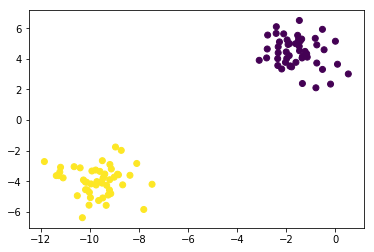

In [154]:
w_lr = lr_sg(X,y,iterations=10000)
print(w_lr)

plt.scatter(X[:,0],X[:,1],c=lr_predictor(X,w_lr))
plt.show()

## Logistic Regression with Scikit Learn

In [139]:
from sklearn.linear_model import LogisticRegression

# Train the logistic regression classifier
clf = LogisticRegression()
clf.fit(X, y)
clf.score(X,y) # classification accuracy

1.0

In [99]:
# Helper function to plot a decision boundary.
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

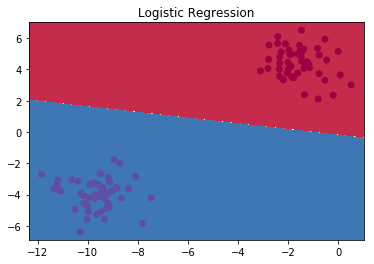

In [140]:
# Plot the decision boundary
plot_decision_boundary(lambda x: clf.predict(x))
plt.title("Logistic Regression")
plt.show()

Logistic Regression requires the data to be linear separable. To illustrate this issue, we make use of the sklearn generator `make_moons`, which produces to half-circles, that are not linear separable:

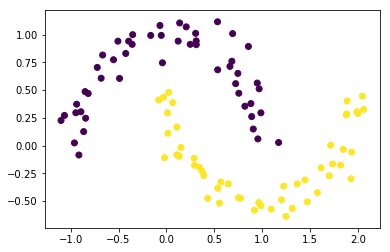

In [141]:
from sklearn.datasets.samples_generator import make_moons

X,y = make_moons(n_samples=100,noise=0.1,random_state=0)
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

Now again, we fit our model. As you can see from the decision boundary, some examples are misclassified.

Accuracy: 0.86


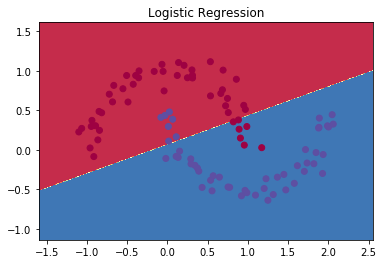

In [142]:
# Train the logistic regression classifier
clf = LogisticRegression()
clf.fit(X, y)
print("Accuracy:",clf.score(X,y))

plot_decision_boundary(lambda x: clf.predict(x))
plt.title("Logistic Regression")
plt.show()

To overcome this issue, we can apply some feature-engineering: We add additional features, created from the existing ones. This way, we increase the dimension of our feature space (from 2-dimensional to 7-dimensional). In the 7-dimensional space, the data may be (better) separable.

In [143]:
def feature_transformation(x):
    x3 = x[:,0] + x[:,1]
    x4 = x[:,0] * x[:,1] ** 4
    x5= x[:,0] ** 2
    x6 = x[:,0] ** 3
    x7= x[:,1] ** 7
    x = np.column_stack((x,x3,x4,x5,x6,x7))
    return x

We fit our model on the transformed data. After fitting, we make predictions also on the transformed data. Plots are still in 2d.

Accuracy: 0.94


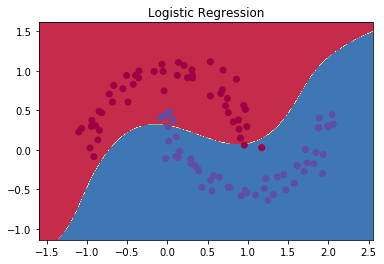

In [144]:
# Train the logistic regression classifier
transformed_x = feature_transformation(X)
clf = LogisticRegression()
clf.fit(transformed_x, y)
print("Accuracy:",clf.score(transformed_x,y))

# Plot the decision boundary
plot_decision_boundary(lambda x: clf.predict(feature_transformation(x)))
plt.title("Logistic Regression")
plt.show()

In [145]:
from sklearn import datasets
iris = datasets.load_iris()

np.random.seed(0)
indices = np.random.permutation(len(iris.data))
iris_X_train = iris.data[indices[:-10]]
iris_y_train = iris.target[indices[:-10]]
iris_X_test  = iris.data[indices[-10:]]
iris_y_test  = iris.target[indices[-10:]]


clf = LogisticRegression(C=1e5)

clf.fit(iris_X_train, iris_y_train)



LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [106]:
print ("Predicted flower classes:\t", clf.predict(iris_X_test))
print ("True flower classes     :\t", iris_y_test)
print ("correct classifciation? :\t", clf.predict(iris_X_test) 
                                     == iris_y_test)
print ("classifc. accuracy (in %)  :\t", \
      np.sum(clf.predict(iris_X_test) == iris_y_test)*100.0\
      /len(iris_y_test))

Predicted flower classes:	 [1 2 1 0 0 0 2 1 2 0]
True flower classes     :	 [1 1 1 0 0 0 2 1 2 0]
correct classifciation? :	 [ True False  True  True  True  True  True  True  True  True]
classifc. accuracy (in %)  :	 90.0


## Multiclass, Multilabel Classification


- **Multiclass-Classifier:** A classifier is capable to select from more than one class, i.e. a flower can be assigned to seritosa, vertigo and virsicolor
- **Multilabel-Classifier:** An example is assigned to one or more classes

Our original regression problem only predicted one variable ($y$), which translates into a binary classification model, i.e. an example is assigned to a class or not.

If possible, Scikit learn automatically extends the estimators to multiclass-labels, according to the following strategies. 

Multiclass problems can be decomposed into binary classification problems:

- "One vs. All" approach: One classifier per class trained against all other classes
- "One vs. One" approach: There is a classifier for each pair of classes, resulting in $k*(k-1)/2$ classifiers, where $k$ is the number of classes. An example is assigned to the class that has won most often. 

See the [sklearn documentation](http://scikit-learn.org/stable/modules/multiclass.html) for details.

#### One vs. All Decision Surfaces for the Logistic Regression on the IRIS Data

Automatically created module for IPython interactive environment


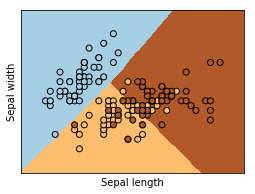

In [107]:
print(__doc__)


# Code source: Gael Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

h = .02  # step size in the mesh

logreg = linear_model.LogisticRegression(C=1e5)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()
